<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-nworbehc/blob/main/Kapitza_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PSEUDOCODE FOR KAPITZA PENDULUM**

1. Import packages
    - numpy, scipy.integrate for solve_ivp

2. Define the equation of motion
  - for the pendulum:
$$\theta'' + 2\zeta\theta' + (\epsilon^{2} - \alpha\cos\theta)\sin\theta = 0$$

$$ \zeta = \gamma/\omega_{d} $$
$$ \epsilon = \omega_{0}/\omega_{d} $$
$$ \alpha = y_{0}/l $$
$$ \tau = \omega_{d}t $$
$$ \omega_0 = \sqrt(g/l) $$

  - in the form of solve_ivp:
$$ \theta'' = - 2\zeta\theta' - (\epsilon^{2} - \alpha\cos\theta)\sin\theta $$

3. Define functions
    - `kapitza_pendulum(tau, y, epsilon, alpha, zeta)`
    - `basic_plot(t, x, xlabel=None, ylabel=None, figsize=(3,3))`
    - `alpha_critical(epsilon, zeta, coef):`
      - this is our guess for the inverted state, returns alpha

5. Define parameters
   - omega_d : driven frequency
   - g : gravitational acceleration
   - l : length of pendulum
   - gamma : damping constant
   - t_min, t_max : starting and ending time of the simulation
   - t_span : defined as the difference between t_min and t_max
   - theta_0 : initial condition of the angle
   - ang_vel_0 : initial condition of the angular velocity

6. Solve equations of motion
  - use solve_ivp to find equation of motion for the driven pendulum

In [1]:
#IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

In [12]:
#Define functions
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
    """
    Defines equation of motion for our pendulum

    tau     = dimensionless time
    y       = state variable, defined as theta and ang_vel
    epsilon = ratio of natural frequency to driven frequency, = omega_0/omega_d
    alpha = driving strength, relative displacement of the pivot to the pendulum arm, = y_0/l
    zeta = dimensionless damping

    Returns: dy/dtau = dime derivatives of state variables
    """
    theta, ang_vel = y # unpacking our state variable
    dtheta_dtau = ang_vel # first derivative
    d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta)  # second derivative
    dy_dtau = np.array([dtheta_dtau, d2theta_dtau2])
    return dy_dtau

def basic_plot(t, y, xlabel=None, ylabel=None,figsize=(3,3)):
  plt.figure(figsize=figsize)
  plt.plot(t,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def alpha_critical(epsilon, zeta, coef):
  """
  Defines the boundary of the inverted state

  epsilon : dimensionless frequency
  zeta : dimensionless damping
  coef : tuning paramete

  Returns: alpha : relative displacement of the pivot to the pendulum arm
  """
  alpha = coef*epsilon**2   #totally random starter guess
  return alpha

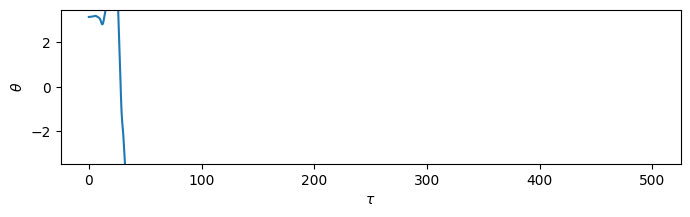

In [24]:
#DEFINE PARAMETERS

#inputs
epsilon = 0.2
alpha = 1
zeta = 0.1

#number of decay times we want to integrate over
n_decay = 100

#tau parameters
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_span = [tau_min, tau_max]

#initial conditions
delta_theta = 0.01
theta_0 = np.pi - delta_theta     # we don't want to be exactly at inverted state, delta_theta is small deviation from pi
ang_vel_0 = 0
y_0 = [theta_0, ang_vel_0]

#SOLVE EQUATION
solution = solve_ivp(kapitza_pendulum,
                    tau_span, y_0,
                    args=(epsilon, alpha, zeta),
                    methods='Radau',
                    dense_output=True)

#PLOTS
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

#basic_plot(tau_plot, theta_plot, xlabel=r'$\tau$', ylabel=r'$\theta$', figsize=(6,2))
plt.figure(figsize=(8,2))
plt.plot(tau_plot,theta_plot)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.ylim(-np.pi*1.1, np.pi*1.1)
plt.show()